## Step 1: Ingest and Analyze the Data


In [54]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Importing dataset

housing_info_df = pd.read_csv('train.csv', encoding = 'latin')
housing_info_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [57]:
# Analyze Data

housing_info_df.info()
housing_info_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [58]:
housing_info_df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## Step 2: Data Cleaning 

In [59]:
# check for null values in all categorical columns

housing_info_df.select_dtypes(include='object').isnull().sum()[housing_info_df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [60]:
# Impute NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_info_df[col]=housing_info_df[col].fillna('None')

In [61]:
#Check if rows have more nan values which can be removed 
housing_info_df.isnull().sum(axis=1).nlargest(3)
#Only max 2 nan values find in three rows. Hence removing rows will not add any signifcance to EDA 


234    2
287    2
307    2
dtype: int64

In [62]:
# Drop the columns that have more than 85% values associated to a specific value for categorical values.

categorical_columns = housing_info_df.select_dtypes(include=['object'])
for col in (categorical_columns):
    if(housing_info_df[col].value_counts().max() *100.0/housing_info_df.shape[0] > 85):
        housing_info_df.drop(col,axis = 1,inplace = True)

housing_info_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  EnclosedPorch  3SsnPorch  \
0      CollgCr     1Fam     2Story  ...              0          0   
1      Veenker     1Fam     1Story  ...              0          0   
2      CollgCr     1Fam     2Story  ...              0          0   
3      Crawfor     1Fam     2Story  ...            272          0   
4      NoRidge     1Fam     2Story  ...              0          0   

   ScreenPorch  PoolArea Fence MiscVal MoSold YrSold  SaleCondition SalePrice  
0            0         0  None       0      2   2008         Normal    208500  
1            0         0  None       0      5   2007         Normal    181500  
2            0         0  None       0      9   2008         Normal    223500  
3            0         0  None       0      2   2006        Abnorml    140000  
4            0         0  None       0     12   2008         Normal    250000  

[5 rows x 60 columns]

In [63]:
# once again check for null values in all categorical columns

housing_info_df.select_dtypes(include='object').isnull().sum()[housing_info_df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables 

#### Removing null values in Numerical attributes

In [64]:
# check the null values in the numerical data

housing_info_df.select_dtypes(include=['int64','float']).isnull().sum()[housing_info_df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [65]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

housing_info_df['LotFrontage'] = housing_info_df['LotFrontage'].replace(np.nan, housing_info_df['LotFrontage'].median())
housing_info_df['MasVnrArea'] = housing_info_df['MasVnrArea'].replace(np.nan, housing_info_df['MasVnrArea'].median())

In [66]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housing_info_df['GarageYrBlt']=housing_info_df['GarageYrBlt'].fillna(0)
housing_info_df['GarageYrBlt'] = housing_info_df['GarageYrBlt'].astype(int)

In [67]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_info_df['IsRemodelled'] = housing_info_df.apply(checkForRemodel, axis=1)
housing_info_df.head()    

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  3SsnPorch  ScreenPorch  PoolArea  \
0      CollgCr     1Fam     2Story  ...          0            0         0   
1      Veenker     1Fam     1Story  ...          0            0         0   
2      CollgCr     1Fam     2Story  ...          0            0         0   
3      Crawfor     1Fam     2Story  ...          0            0         0   
4      NoRidge     1Fam     2Story  ...          0            0         0   

   Fence MiscVal MoSold YrSold SaleCondition  SalePrice IsRemodelled  
0   None       0      2   2008        Normal     208500            0  
1   None       0      5   2007        Normal     181500            0  
2   None       0      9   2008        Normal     223500            1  
3   None       0      2   2006       Abnorml     140000            1  
4   None       0     12   2008        Normal     250000            0  

[5 rows x 61 columns]

In [68]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_info_df['BuiltOrRemodelAge'] = housing_info_df.apply(getAge, axis=1)
housing_info_df.head()  

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  ScreenPorch  PoolArea  Fence  \
0      CollgCr     1Fam     2Story  ...            0         0   None   
1      Veenker     1Fam     1Story  ...            0         0   None   
2      CollgCr     1Fam     2Story  ...            0         0   None   
3      Crawfor     1Fam     2Story  ...            0         0   None   
4      NoRidge     1Fam     2Story  ...            0         0   None   

   MiscVal MoSold YrSold SaleCondition SalePrice  IsRemodelled  \
0        0      2   2008        Normal    208500             0   
1        0      5   2007        Normal    181500             0   
2        0      9   2008        Normal    223500             1   
3        0      2   2006       Abnorml    140000             1   
4        0     12   2008        Normal    250000             0   

  BuiltOrRemodelAge  
0                 5  
1                31  
2                 6  
3                36  
4                 8  

[5 rows x 62 columns]

In [69]:
# Create a new column which would indicate if the Garage is old or new.


def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing_info_df['OldOrNewGarage'] = housing_info_df['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing_info_df.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  PoolArea  Fence  MiscVal  MoSold  \
0      CollgCr     1Fam     2Story  ...         0   None        0       2   
1      Veenker     1Fam     1Story  ...         0   None        0       5   
2      CollgCr     1Fam     2Story  ...         0   None        0       9   
3      Crawfor     1Fam     2Story  ...         0   None        0       2   
4      NoRidge     1Fam     2Story  ...         0   None        0      12   

  YrSold SaleCondition SalePrice IsRemodelled  BuiltOrRemodelAge  \
0   2008        Normal    208500            0                  5   
1   2007        Normal    181500            0                 31   
2   2008        Normal    223500            1                  6   
3   2006       Abnorml    140000            1                 36   
4   2008        Normal    250000            0                  8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 63 columns]

In [70]:
#Drop original columns
housing_info_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [71]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housing_info_df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing_info_df[col].value_counts().max() *100 /housing_info_df.shape[0] > 85):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housing_info_df.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_info_df.drop(['MoSold'], axis = 1, inplace = True)

housing_info_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood BldgType HouseStyle  ...  GarageCars  GarageArea WoodDeckSF  \
0      CollgCr     1Fam     2Story  ...           2         548          0   
1      Veenker     1Fam     1Story  ...           2         460        298   
2      CollgCr     1Fam     2Story  ...           2         608          0   
3      Crawfor     1Fam     2Story  ...           3         642          0   
4      NoRidge     1Fam     2Story  ...           3         836        192   

  OpenPorchSF Fence SaleCondition  SalePrice IsRemodelled BuiltOrRemodelAge  \
0          61  None        Normal     208500            0                 5   
1           0  None        Normal     181500            0                31   
2          42  None        Normal     223500            1                 6   
3          35  None       Abnorml     140000            1                36   
4          84  None        Normal     250000            0                 8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 49 columns]

In [72]:
# check for percentage of null values in each column

percent_missing = round(100*(housing_info_df.isnull().sum()/len(housing_info_df.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


Hence there are no null values in the dataset

#### Check for Duplicates

In [73]:
# Check if there are any duplicate values in the dataset

housing_info_df[housing_info_df.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, Fence, SaleCondition, SalePrice, IsRemodelled, BuiltOrRemodelAge, OldOrNewGarage]
Index: []

[0 rows x 49 columns]

No duplicate entries found !!!

#### Outlier Treatment

In [74]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing_info_df.describe(percentiles=[.25,.5,.75,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      5.575342   103.117123   443.639726   567.240411  1057.429452  ...   
std       1.112799   180.731373   456.098091   441.866955   438.705324  ...   
min       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       5.000000     0.000000   383.500000   477.500000   991.500000  ...   
75%       6.000000   164.250000   712.250000   808.000000  1298.250000  ...   
95%       8.000000   456.000000  1274.000000  1468.000000  1753.000000  ...   
99%       9.000000   791.280000  1572.410000  1797.050000  2155.050000  ...   
max       9.000000  1600.000000  5644.000000  2336.000000  6110.000000  ...   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
95%       10.000000     2.000000     3.000000   850.100000   335.000000   
99%       11.000000     2.000000     3.000000  1002.790000   505.460000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF      SalePrice  IsRemodelled  BuiltOrRemodelAge  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean     46.660274  180921.195890      0.476712          22.950000   
std      66.256028   79442.502883      0.499629          20.640653   
min       0.000000   34900.000000      0.000000          -1.000000   
25%       0.000000  129975.000000      0.000000           4.000000   
50%      25.000000  163000.000000      0.000000          14.000000   
75%      68.000000  214000.000000      1.000000          41.000000   
95%     175.050000  326100.000000      1.000000          58.000000   
99%     285.820000  442567.010000      1.000000          60.000000   
max     547.000000  755000.000000      1.000000          60.000000   

       OldOrNewGarage  
count     1460.000000  
mean         0.275342  
std          0.446840  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[10 rows x 27 columns]

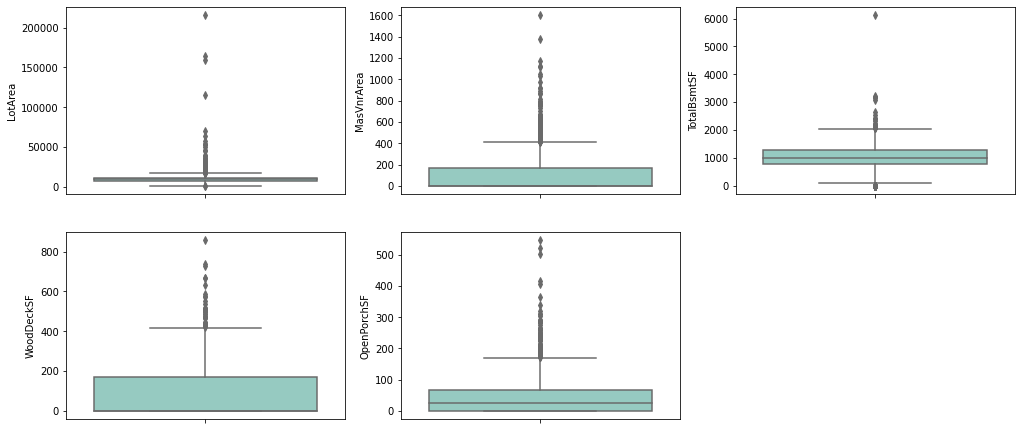

In [75]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing_info_df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing_info_df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing_info_df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing_info_df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing_info_df)
plt.show()

In [76]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housing_info_df['LotArea'].quantile(0.85)
housing_info_df = housing_info_df[housing_info_df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housing_info_df['MasVnrArea'].quantile(0.85)
housing_info_df = housing_info_df[housing_info_df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing_info_df['TotalBsmtSF'].quantile(0.85)
housing_info_df = housing_info_df[housing_info_df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing_info_df['WoodDeckSF'].quantile(0.85)
housing_info_df = housing_info_df[housing_info_df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing_info_df['OpenPorchSF'].quantile(0.85)
housing_info_df = housing_info_df[housing_info_df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

## Step 3: Data Visualization 

<Figure size 720x360 with 0 Axes>

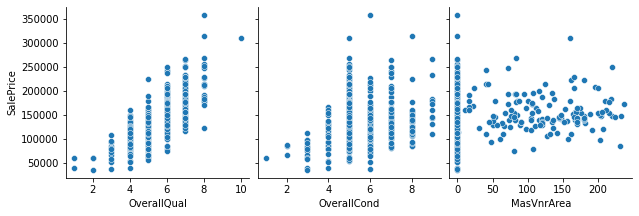

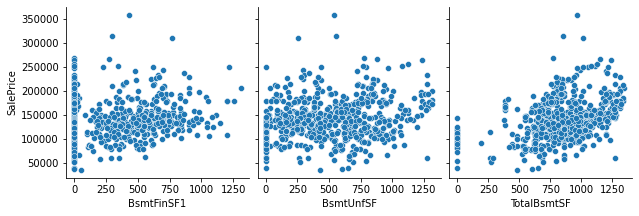

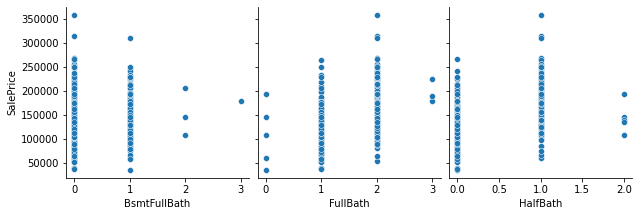

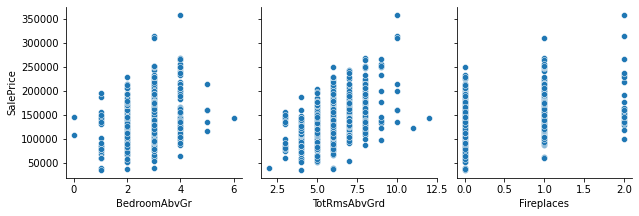

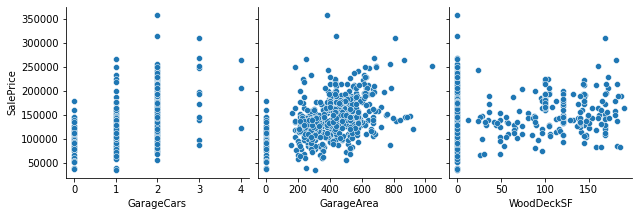

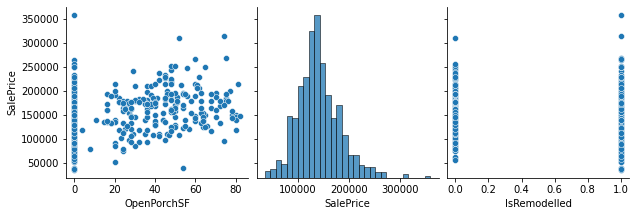

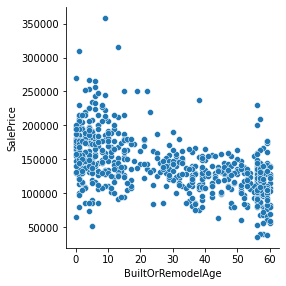

In [77]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housing_info_df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=3, aspect=1,kind='scatter')
sns.pairplot(housing_info_df, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :
    - 1stFlrSF, GrLivArea seems to be showing correlation towards right
    - Rest of the variables are too scattered and hence can be understood during further analysis

In [78]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
corr_matrix = housing_info_df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
g = sns.heatmap(housing_info_df[top_corr_features].corr(),
                annot=True,
                vmax=0.9, 
                cmap="coolwarm")
plt.show()

#### Removing following columns which shows high correlation
    - TotRmsAbvGrd and GrLivArea show 82%
    - Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [79]:
corr_matrix_2 = pd.DataFrame(corr_matrix.iloc[-1,:]).T

throw_away_col = []
for col in corr_matrix_2:
    if abs(0 < corr_matrix_2[col][0]) >= 0.5:
        throw_away_col.append(col)
print(throw_away_col)

['Id', 'MSSubClass', 'OverallQual', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'OldOrNewGarage']


In [80]:
# Removing the highly correlated variables

housing_info_df.drop(['TotRmsAbvGrd', 'GarageArea','Id'], axis = 1, inplace = True)

## Step 4: Data Preparation

  - Converting categorical data into numercal data with lable encoding
  - Creating Dummies

In [81]:
#Lable Encode ordinal categorical values 

housing_info_df['d_LotShape'] = housing_info_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_info_df['d_ExterQual'] = housing_info_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_info_df['d_BsmtQual'] = housing_info_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_info_df['d_BsmtExposure'] = housing_info_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_info_df['d_BsmtFinType1'] = housing_info_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_info_df['d_HeatingQC'] = housing_info_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_info_df['d_KitchenQual'] = housing_info_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_info_df['d_FireplaceQu'] = housing_info_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_info_df['d_GarageFinish'] = housing_info_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_info_df['d_BldgType'] = housing_info_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_info_df['d_HouseStyle'] = housing_info_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_info_df['d_Fence'] = housing_info_df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_info_df['d_LotConfig'] = housing_info_df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_info_df['d_MasVnrType'] = housing_info_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_info_df['d_SaleCondition'] = housing_info_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_info_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
8          50       RM         51.0     6120      Reg    Inside      OldTown   
9         190       RL         50.0     7420      Reg    Corner      BrkSide   

  BldgType HouseStyle  OverallQual  ...  d_HeatingQC d_KitchenQual  \
0     1Fam     2Story            7  ...            5             4   
2     1Fam     2Story            7  ...            5             4   
3     1Fam     2Story            7  ...            4             4   
8     1Fam     1.5Fin            7  ...            4             3   
9   2fmCon     1.5Unf            5  ...            5             3   

  d_FireplaceQu d_GarageFinish d_BldgType  d_HouseStyle d_Fence d_LotConfig  \
0             0              2          1             4       0           5   
2             3              2          1             4       0           5   
3             4              1          1             4       0           4   
8             3              1          1             3       0           5   
9             3              2          2             2       0           4   

  d_MasVnrType d_SaleCondition  
0            1               1  
2            1               1  
3            0               0  
8            0               0  
9            0               1  

[5 rows x 61 columns]

In [82]:
# drop the original columns from which we ahve derived the new columns 
# We can also drop the id column as it will not be used any more

housing_info_df = housing_info_df.drop( ['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_info_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
8          50       RM         51.0     6120      OldTown            7   
9         190       RL         50.0     7420      BrkSide            5   

   OverallCond RoofStyle Exterior1st Exterior2nd  ...  d_HeatingQC  \
0            5     Gable     VinylSd     VinylSd  ...            5   
2            5     Gable     VinylSd     VinylSd  ...            5   
3            5     Gable     Wd Sdng     Wd Shng  ...            4   
8            5     Gable     BrkFace     Wd Shng  ...            4   
9            6     Gable     MetalSd     MetalSd  ...            5   

  d_KitchenQual  d_FireplaceQu  d_GarageFinish  d_BldgType  d_HouseStyle  \
0             4              0               2           1             4   
2             4              3               2           1             4   
3             4              4               1           1             4   
8             3              3               1           1             3   
9             3              3               2           2             2   

   d_Fence  d_LotConfig  d_MasVnrType  d_SaleCondition  
0        0            5             1                1  
2        0            5             1                1  
3        0            4             0                0  
8        0            5             0                0  
9        0            4             0                1  

[5 rows x 46 columns]

In [83]:
# For the following non-ordinal categorical columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing_info_df['MSZoning'], prefix='MSZoning', drop_first = True)
housing_info_df = pd.concat([housing_info_df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing_info_df['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_info_df = pd.concat([housing_info_df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing_info_df['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_info_df = pd.concat([housing_info_df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing_info_df['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_info_df = pd.concat([housing_info_df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing_info_df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_info_df = pd.concat([housing_info_df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing_info_df['Foundation'], prefix='Foundation', drop_first = True)
housing_info_df = pd.concat([housing_info_df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing_info_df['GarageType'], prefix='GarageType', drop_first = True)
housing_info_df = pd.concat([housing_info_df, d_GarageType], axis = 1)

housing_info_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
8          50       RM         51.0     6120      OldTown            7   
9         190       RL         50.0     7420      BrkSide            5   

   OverallCond RoofStyle Exterior1st Exterior2nd  ...  Foundation_PConc  \
0            5     Gable     VinylSd     VinylSd  ...                 1   
2            5     Gable     VinylSd     VinylSd  ...                 1   
3            5     Gable     Wd Sdng     Wd Shng  ...                 0   
8            5     Gable     BrkFace     Wd Shng  ...                 0   
9            6     Gable     MetalSd     MetalSd  ...                 0   

  Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0               0                 0                0                  1   
2               0                 0                0                  1   
3               0                 0                0                  0   
8               0                 0                0                  0   
9               0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
2                  0                0  
3                  1                0  
8                  1                0  
9                  0                0  

[5 rows x 115 columns]

In [84]:
# drop the below columns as we now have new columns derived from these columns

housing_info_df = housing_info_df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_info_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
8          50         51.0     6120            7            5         0.0   
9         190         50.0     7420            5            6         0.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Foundation_PConc  \
0         706        150          856       856  ...                 1   
2         486        434          920       920  ...                 1   
3         216        540          756       961  ...                 0   
8           0        952          952      1022  ...                 0   
9         851        140          991      1077  ...                 0   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
8                0                 0                0                  0   
9                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
2                  0                0  
3                  1                0  
8                  1                0  
9                  0                0  

[5 rows x 108 columns]

In [85]:
housing_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 1457
Columns: 108 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(37), uint8(69)
memory usage: 261.2 KB


Observations: All columns in the data set are now numeric.

## Step 5: Train Test Split

In [86]:
# Putting all feature variable to X

X = housing_info_df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
8          50         51.0     6120            7            5         0.0   
9         190         50.0     7420            5            6         0.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  Foundation_PConc  \
0         706        150          856       856  ...                 1   
2         486        434          920       920  ...                 1   
3         216        540          756       961  ...                 0   
8           0        952          952      1022  ...                 0   
9         851        140          991      1077  ...                 0   

   Foundation_Slab  Foundation_Stone  Foundation_Wood  GarageType_Attchd  \
0                0                 0                0                  1   
2                0                 0                0                  1   
3                0                 0                0                  0   
8                0                 0                0                  0   
9                0                 0                0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
8                   0                   0                   0   
9                   0                   0                   0   

   GarageType_Detchd  GarageType_None  
0                  0                0  
2                  0                0  
3                  1                0  
8                  1                0  
9                  0                0  

[5 rows x 107 columns]

In [87]:
# Putting response variable to y

y = housing_info_df['SalePrice']
y.head()

0    208500
2    223500
3    140000
8    129900
9    118000
Name: SalePrice, dtype: int64

#### Scaling the features

In [88]:
# scaling the features as I was getting error ValueError: Input contains NaN, infinity or a value too large

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
#X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=107)

In [89]:
# split into train and test


np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Step 5: Recursive feature elimination (RFE)¶

   

In [90]:
# Running RFE with the output number of the variable equal to 50 as there are too huge colmns like 111

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [91]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0            OverallQual         True            1
1           BsmtFullBath         True            1
2               FullBath         True            1
3               HalfBath         True            1
4             Fireplaces         True            1
5             GarageCars         True            1
6          d_KitchenQual         True            1
7            MSZoning_RH         True            1
8            MSZoning_RL         True            1
9            MSZoning_RM         True            1
10  Neighborhood_Blueste         True            1
11  Neighborhood_Crawfor         True            1
12  Neighborhood_Gilbert         True            1
13  Neighborhood_NPkVill         True            1
14   Neighborhood_NWAmes         True            1
15  Neighborhood_NridgHt         True            1
16  Neighborhood_OldTown         True            1
17  Neighborhood_Somerst         True            1
18  Neighborhood_StoneBr         True            1
19   Neighborhood_Timber         True            1
20       RoofStyle_Gable         True            1
21     RoofStyle_Gambrel         True            1
22         RoofStyle_Hip         True            1
23   Exterior1st_AsphShn         True            1
24   Exterior1st_BrkComm         True            1
25   Exterior1st_HdBoard         True            1
26   Exterior1st_MetalSd         True            1
27   Exterior1st_Plywood         True            1
28   Exterior1st_VinylSd         True            1
29   Exterior1st_Wd Sdng         True            1
30   Exterior1st_WdShing         True            1
31   Exterior2nd_AsphShn         True            1
32   Exterior2nd_Brk Cmn         True            1
33   Exterior2nd_HdBoard         True            1
34   Exterior2nd_ImStucc         True            1
35   Exterior2nd_MetalSd         True            1
36   Exterior2nd_Plywood         True            1
37   Exterior2nd_VinylSd         True            1
38   Exterior2nd_Wd Sdng         True            1
39   Exterior2nd_Wd Shng         True            1
40     Foundation_CBlock         True            1
41      Foundation_PConc         True            1
42      Foundation_Stone         True            1
43       Foundation_Wood         True            1
44     GarageType_Attchd         True            1
45    GarageType_Basment         True            1
46    GarageType_BuiltIn         True            1
47    GarageType_CarPort         True            1
48     GarageType_Detchd         True            1
49       GarageType_None         True            1

In [92]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [93]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

#### Ridge

In [94]:
# list pf alphas. These are just any numbers 

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation with 5 folds and 27 alpha parameters

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
22          20     -14935.497314    -15949.039720                1
23          50     -15363.632602    -16020.648519                2
21        10.0     -14718.922241    -16053.152376                3
20         9.0     -14689.317304    -16078.535284                4
19         8.0     -14657.992649    -16109.258185                5
18         7.0     -14621.175044    -16145.553158                6
17         6.0     -14577.692531    -16189.873040                7
16         5.0     -14526.617046    -16243.282291                8
15         4.0     -14462.220958    -16308.826679                9
24         100     -15923.912035    -16368.900047               10
14         3.0     -14374.460938    -16390.239474               11
13         2.0     -14244.491594    -16502.138204               12
12         1.0     -14018.800337    -16651.618609               13
11         0.9     -13985.009528    -16675.213490               14
10         0.8     -13946.822828    -16700.480181               15
9          0.7     -13903.551820    -16727.816068               16
8          0.6     -13854.043715    -16756.676737               17
7          0.5     -13797.539970    -16801.238067               18
6          0.4     -13733.328003    -16849.568983               19
5          0.3     -13662.002504    -16900.176757               20
4          0.2     -13578.845254    -16962.709187               21
3          0.1     -13476.416777    -17021.143855               22
2         0.01     -13362.335592    -17099.916118               23
1        0.001     -13349.433695    -17125.167854               24
0       0.0001     -13348.114530    -17127.809999               25
25         500     -19461.611060    -19684.728906               26

In [96]:
# Plot mean test and train scoes for all levels of  alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')


plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [97]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=20)

In [98]:
# check the coefficient values with lambda = 10

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([13969.63178963,  7405.45781329, 11331.58167917, 11173.32194215,
       10492.1767836 , 10111.58998145,  7682.53938786,   153.78358346,
        9004.17528584, -6120.13434456, -1218.14972797, 11857.0705351 ,
       -5872.03929144, -2425.06927941, -1781.0829098 ,   -18.05565013,
       -2776.49215532,  5326.23358856,    67.80550206,  3067.01272413,
        -801.83225501,  -664.61600072,   623.72113818,  -692.92534464,
       -2345.00224942,   105.63787503,  1677.41878946, -3038.41014538,
        1185.15762927, -4715.96332624, -4853.60100744,   344.48959551,
       -3285.74856227, -1353.94171482,   401.30967594,  1665.68256815,
        1129.32645885,  3527.39194363,  5097.65798187, -4661.77520167,
        1143.55958772,  3852.4673445 ,  3439.67232266,  3264.85982193,
        2306.82244117,  4567.82512101,  2783.76693569, -3076.62830305,
       -2910.95475525, -1747.41207112])

In [99]:
# Calculate the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

473107268.4958245

In [100]:
rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
rmse

21751.02913647592

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, ridge.predict(X_test))  

0.7115369329243628

In [102]:
#checking the value of optimum number of parameters
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 20}
-15949.03972046895


In [103]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0            OverallQual   13969.6318
1           BsmtFullBath    7405.4578
2               FullBath   11331.5817
3               HalfBath   11173.3219
4             Fireplaces   10492.1768
5             GarageCars   10111.5900
6          d_KitchenQual    7682.5394
7            MSZoning_RH     153.7836
8            MSZoning_RL    9004.1753
9            MSZoning_RM   -6120.1343
10  Neighborhood_Blueste   -1218.1497
11  Neighborhood_Crawfor   11857.0705
12  Neighborhood_Gilbert   -5872.0393
13  Neighborhood_NPkVill   -2425.0693
14   Neighborhood_NWAmes   -1781.0829
15  Neighborhood_NridgHt     -18.0557
16  Neighborhood_OldTown   -2776.4922
17  Neighborhood_Somerst    5326.2336
18  Neighborhood_StoneBr      67.8055
19   Neighborhood_Timber    3067.0127
20       RoofStyle_Gable    -801.8323
21     RoofStyle_Gambrel    -664.6160
22         RoofStyle_Hip     623.7211
23   Exterior1st_AsphShn    -692.9253
24   Exterior1st_BrkComm   -2345.0022
25   Exterior1st_HdBoard     105.6379
26   Exterior1st_MetalSd    1677.4188
27   Exterior1st_Plywood   -3038.4101
28   Exterior1st_VinylSd    1185.1576
29   Exterior1st_Wd Sdng   -4715.9633
30   Exterior1st_WdShing   -4853.6010
31   Exterior2nd_AsphShn     344.4896
32   Exterior2nd_Brk Cmn   -3285.7486
33   Exterior2nd_HdBoard   -1353.9417
34   Exterior2nd_ImStucc     401.3097
35   Exterior2nd_MetalSd    1665.6826
36   Exterior2nd_Plywood    1129.3265
37   Exterior2nd_VinylSd    3527.3919
38   Exterior2nd_Wd Sdng    5097.6580
39   Exterior2nd_Wd Shng   -4661.7752
40     Foundation_CBlock    1143.5596
41      Foundation_PConc    3852.4673
42      Foundation_Stone    3439.6723
43       Foundation_Wood    3264.8598
44     GarageType_Attchd    2306.8224
45    GarageType_Basment    4567.8251
46    GarageType_BuiltIn    2783.7669
47    GarageType_CarPort   -3076.6283
48     GarageType_Detchd   -2910.9548
49       GarageType_None   -1747.4121

In [104]:
# Create dictionarythe with Features and their coefficient values 

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'OverallQual': 13969.6318,
 'BsmtFullBath': 7405.4578,
 'FullBath': 11331.5817,
 'HalfBath': 11173.3219,
 'Fireplaces': 10492.1768,
 'GarageCars': 10111.59,
 'd_KitchenQual': 7682.5394,
 'MSZoning_RH': 153.7836,
 'MSZoning_RL': 9004.1753,
 'MSZoning_RM': -6120.1343,
 'Neighborhood_Blueste': -1218.1497,
 'Neighborhood_Crawfor': 11857.0705,
 'Neighborhood_Gilbert': -5872.0393,
 'Neighborhood_NPkVill': -2425.0693,
 'Neighborhood_NWAmes': -1781.0829,
 'Neighborhood_NridgHt': -18.0557,
 'Neighborhood_OldTown': -2776.4922,
 'Neighborhood_Somerst': 5326.2336,
 'Neighborhood_StoneBr': 67.8055,
 'Neighborhood_Timber': 3067.0127,
 'RoofStyle_Gable': -801.8323,
 'RoofStyle_Gambrel': -664.616,
 'RoofStyle_Hip': 623.7211,
 'Exterior1st_AsphShn': -692.9253,
 'Exterior1st_BrkComm': -2345.0022,
 'Exterior1st_HdBoard': 105.6379,
 'Exterior1st_MetalSd': 1677.4188,
 'Exterior1st_Plywood': -3038.4101,
 'Exterior1st_VinylSd': 1185.1576,
 'Exterior1st_Wd Sdng': -4715.9633,
 'Exterior1st_WdShing': -4853.601

#### RFE

In [105]:
# To reduce the featue, REF with 15 is performed
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [106]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
3   Neighborhood_Crawfor         True            1   11857.0705
1            MSZoning_RL         True            1    9004.1753
5   Neighborhood_Somerst         True            1    5326.2336
11    GarageType_Basment         True            1    4567.8251
8       Foundation_Stone         True            1    3439.6723
9        Foundation_Wood         True            1    3264.8598
12    GarageType_BuiltIn         True            1    2783.7669
10     GarageType_Attchd         True            1    2306.8224
0            MSZoning_RH         True            1     153.7836
6    Exterior1st_BrkComm         True            1   -2345.0022

In [107]:
mean_squared_error(y_test, ridge.predict(X_test))

473107268.4958245

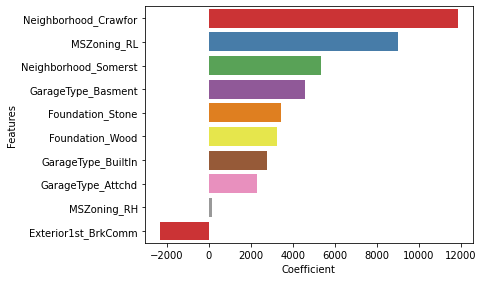

In [108]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price 
of a house.    

#### Lasso

In [109]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 10
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [110]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
10        0.01     -13508.101334    -16782.513792                1
9        0.005     -13508.046102    -16792.619797                2
8        0.004     -13508.035056    -16794.640998                3
7        0.003     -13508.024009    -16796.662199                4
6        0.002     -13508.012963    -16798.683400                5
5        0.001     -13508.001916    -16800.704601                6
4       0.0005     -13507.996393    -16801.715201                7
3       0.0004     -13507.995289    -16801.917322                8
2       0.0003     -13507.994184    -16802.119442                9
1       0.0002     -13507.993079    -16802.321562               10
0       0.0001     -13507.991975    -16802.523682               11

In [111]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [112]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.01)

In [113]:
# check the coefficient values with lambda = 0.01

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 11134.85044155,   9613.44870012,  14452.82925078,  14232.90432309,
         9453.97687782,  13147.76938531,   8163.3385089 ,  28210.78888509,
        31996.48331669,  19061.41303867, -27988.97630911,  31304.48904744,
       -13094.96764097, -31332.32260435,  -6097.94671332,  13303.71015916,
        -2051.34357993,  36748.32704377,   5724.99672161,  -4116.12348511,
       -13023.82801723, -11824.77346126, -10289.88718997, -57362.43229495,
       -58945.4606913 , -19379.23091394, -24879.31138947, -25441.25593716,
       -48340.45919387, -31954.54040285, -31009.96563861,  43413.80727123,
        26554.52689629,  20654.04841918,  26633.2212413 ,  30678.32861251,
        24937.64474096,  56063.70510479,  34229.05348538,  17537.16779054,
         5123.13153461,   5843.23302561,  65360.27161001,  78172.48547483,
        41737.29709384,  50306.02026048,  49834.68803964,  23626.24940278,
        35588.1719842 ,  40491.3939328 ])

In [114]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

533627092.1301402

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, lasso.predict(X_test)) 

0.6746367728402963

In [116]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            OverallQual   11134.8504
1           BsmtFullBath    9613.4487
2               FullBath   14452.8293
3               HalfBath   14232.9043
4             Fireplaces    9453.9769
5             GarageCars   13147.7694
6          d_KitchenQual    8163.3385
7            MSZoning_RH   28210.7889
8            MSZoning_RL   31996.4833
9            MSZoning_RM   19061.4130
10  Neighborhood_Blueste  -27988.9763
11  Neighborhood_Crawfor   31304.4890
12  Neighborhood_Gilbert  -13094.9676
13  Neighborhood_NPkVill  -31332.3226
14   Neighborhood_NWAmes   -6097.9467
15  Neighborhood_NridgHt   13303.7102
16  Neighborhood_OldTown   -2051.3436
17  Neighborhood_Somerst   36748.3270
18  Neighborhood_StoneBr    5724.9967
19   Neighborhood_Timber   -4116.1235
20       RoofStyle_Gable  -13023.8280
21     RoofStyle_Gambrel  -11824.7735
22         RoofStyle_Hip  -10289.8872
23   Exterior1st_AsphShn  -57362.4323
24   Exterior1st_BrkComm  -58945.4607
25   Exterior1st_HdBoard  -19379.2309
26   Exterior1st_MetalSd  -24879.3114
27   Exterior1st_Plywood  -25441.2559
28   Exterior1st_VinylSd  -48340.4592
29   Exterior1st_Wd Sdng  -31954.5404
30   Exterior1st_WdShing  -31009.9656
31   Exterior2nd_AsphShn   43413.8073
32   Exterior2nd_Brk Cmn   26554.5269
33   Exterior2nd_HdBoard   20654.0484
34   Exterior2nd_ImStucc   26633.2212
35   Exterior2nd_MetalSd   30678.3286
36   Exterior2nd_Plywood   24937.6447
37   Exterior2nd_VinylSd   56063.7051
38   Exterior2nd_Wd Sdng   34229.0535
39   Exterior2nd_Wd Shng   17537.1678
40     Foundation_CBlock    5123.1315
41      Foundation_PConc    5843.2330
42      Foundation_Stone   65360.2716
43       Foundation_Wood   78172.4855
44     GarageType_Attchd   41737.2971
45    GarageType_Basment   50306.0203
46    GarageType_BuiltIn   49834.6880
47    GarageType_CarPort   23626.2494
48     GarageType_Detchd   35588.1720
49       GarageType_None   40491.3939

In [117]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'OverallQual': 11134.850441546118,
 'BsmtFullBath': 9613.448700119045,
 'FullBath': 14452.829250776978,
 'HalfBath': 14232.904323085482,
 'Fireplaces': 9453.976877817642,
 'GarageCars': 13147.769385310707,
 'd_KitchenQual': 8163.338508904917,
 'MSZoning_RH': 28210.78888509172,
 'MSZoning_RL': 31996.483316687456,
 'MSZoning_RM': 19061.41303867101,
 'Neighborhood_Blueste': -27988.976309112095,
 'Neighborhood_Crawfor': 31304.489047438667,
 'Neighborhood_Gilbert': -13094.967640965591,
 'Neighborhood_NPkVill': -31332.322604353532,
 'Neighborhood_NWAmes': -6097.946713315241,
 'Neighborhood_NridgHt': 13303.710159159014,
 'Neighborhood_OldTown': -2051.343579931946,
 'Neighborhood_Somerst': 36748.32704377355,
 'Neighborhood_StoneBr': 5724.996721608937,
 'Neighborhood_Timber': -4116.123485107861,
 'RoofStyle_Gable': -13023.828017233114,
 'RoofStyle_Gambrel': -11824.773461264367,
 'RoofStyle_Hip': -10289.887189965635,
 'Exterior1st_AsphShn': -57362.43229494701,
 'Exterior1st_BrkComm': -58945.460

#### RFE

In [118]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [119]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking   Coefficient
9        Foundation_Wood         True            1  78172.485475
8       Foundation_Stone         True            1  65360.271610
11    GarageType_Basment         True            1  50306.020260
12    GarageType_BuiltIn         True            1  49834.688040
10     GarageType_Attchd         True            1  41737.297094
5   Neighborhood_Somerst         True            1  36748.327044
14     GarageType_Detchd         True            1  35588.171984
1            MSZoning_RL         True            1  31996.483317
3   Neighborhood_Crawfor         True            1  31304.489047
0            MSZoning_RH         True            1  28210.788885

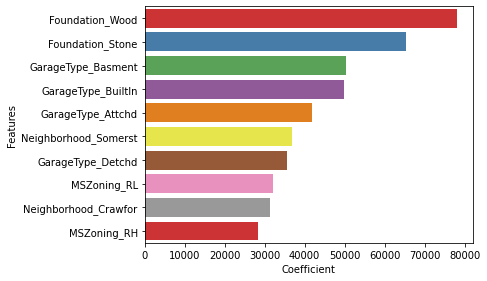

In [120]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.  
